# LIBRA and the Liquid Immersion Blanket
## 1L BABY
- Wall permeation
- FLiBe handing (ClLiF)
- Wall materials
- Tritium probe 

In [1]:
import math
import openmc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, ListedColormap
from openmc_model import baby_model

### Geometry

In [2]:
model = baby_model()
geometry = model.geometry

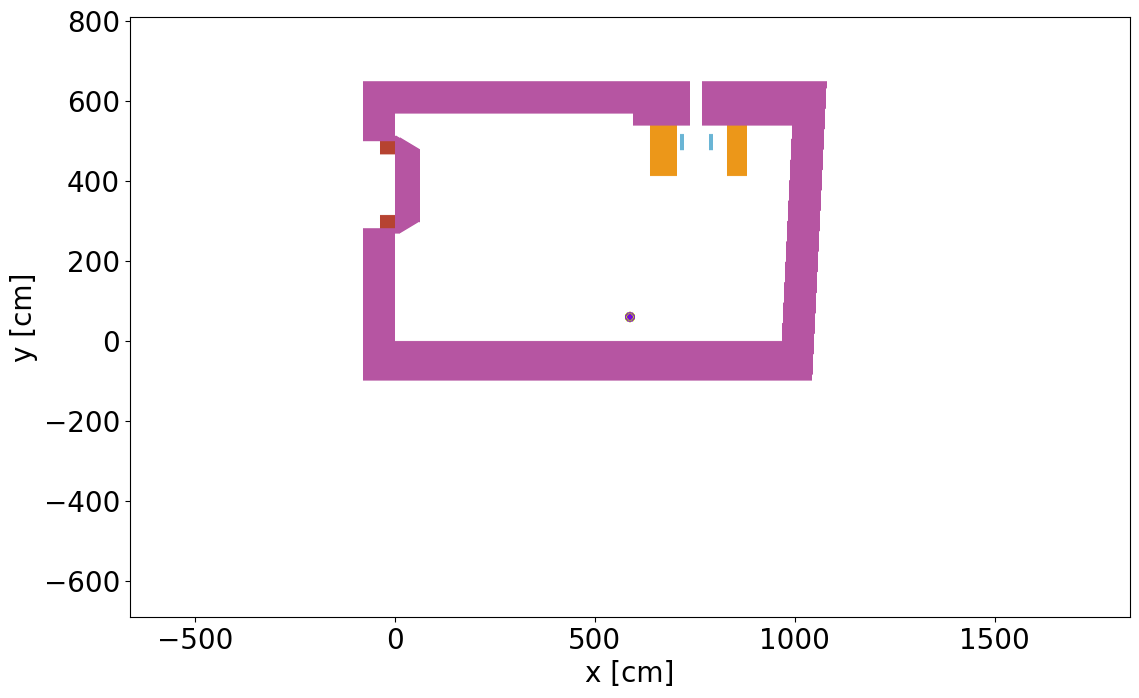

In [3]:
# Visualization

x_c = 587
y_c = 60
z_c = 100
ax = geometry.plot(width=(2500, 1500), 
                   origin=(x_c, y_c, z_c+10), 
                   pixels = (1000, 1000), 
                   basis='xy', 
                   color_by='material',
                   colors = {12 : 'white', 7 : 'white'})
ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()

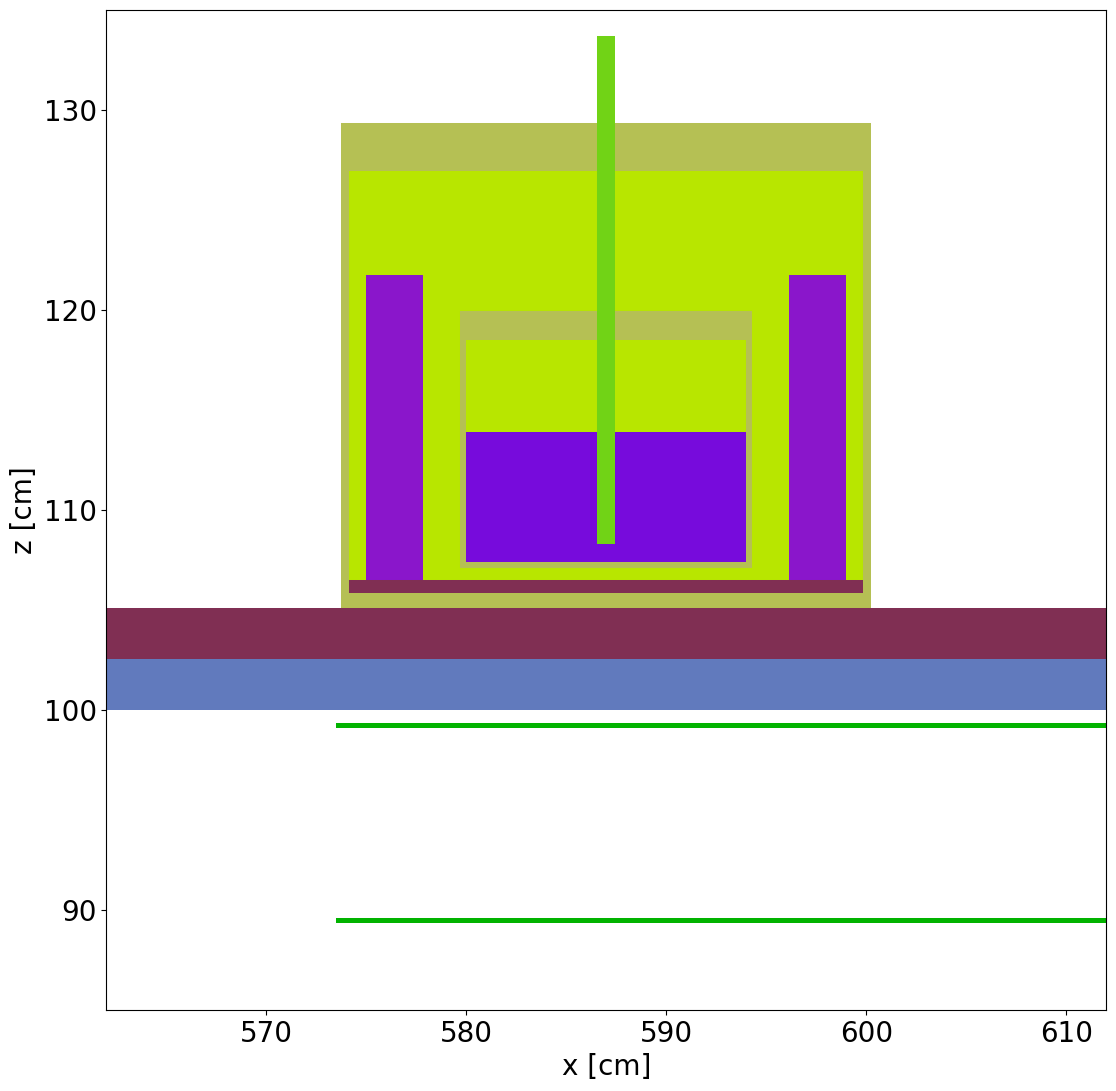

In [4]:
ax = geometry.plot(width=(50, 50), 
                   origin=(x_c, y_c, z_c+10), 
                   pixels = (1000, 1000), 
                   basis='xz', 
                   color_by='material',
                   colors = {12 : 'white', 7 : 'white'})
ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()

### Result

In [5]:
sp = openmc.StatePoint('statepoint.100.h5')
tbr_withvault = sp.get_tally(name='TBR').get_pandas_dataframe()
print(f'TBR: {tbr_withvault['mean'].iloc[0] :.6f}\n')

TBR: 0.001919

